In [54]:
import struct
import datetime
import numpy as np
import matplotlib.pyplot as plt

OLE_TIME_ZERO = datetime.datetime(1899, 12, 30, 0, 0, 0)

def ole2datetime(oledt):
    return (OLE_TIME_ZERO + datetime.timedelta(days=float(oledt))).date()

In [55]:
# typedef struct T6
# {
#   DATE  time; // UTC timestamp of the close, DATE format
#   float fHigh,fLow;	
#   float fOpen,fClose;	
#   float fVal,fVol; // additional data, ask-bid spread, volume etc.
# } T6;


In [56]:
rsize = 8 + 4 * 6
array = []
print('DATE,HIGH,LOW,OPEN,CLOSE')
with open("data\\AAPL.t6", "rb") as f:
    rec = f.read(rsize)
    while rec:
        data = struct.unpack ("dffffff", rec)
        d = ole2datetime(data[0])
        # print(f'{d},{",".join([f"{x:.2f}" for x in data[1:-2]])}')
        rec = f.read(rsize)
        array.append([d,data[4]])


DATE,HIGH,LOW,OPEN,CLOSE


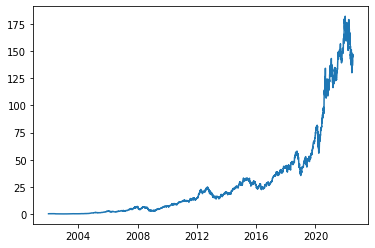

In [61]:
a = np.array(array)
plt.plot(a[:,0],a[:,1])